<a href="https://colab.research.google.com/github/ITBA-Python/Certificacion-Profesional-Python/blob/main/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../') 
import Helper as faux
import pandas as pd
from clases.Persona import Persona


#df_personas, df_trabajadores, df_usuarios, df_peliculas, df_scores=Faux.load_all()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Acciones con la clase Peliculas

# Cargo el df método create_df_from_csv() directamente desde la clase
df_personas = Persona.create_df_from_csv("../data/personas.csv")
df_personas


,id,Full_Name,year_of_birth,Gender,Zip_Code
0,1,Robert Stanley,1974,M,85711
1,2,Heather Bossey,1945,F,94043
2,3,Don Davis,1975,M,32067
3,4,Daniel Mccauley,1974,M,43537
4,5,Janice Mccullough,1965,F,15213
...,...,...,...,...,...
939,941,Quinton Reamer,1978,M,97229
940,942,Ruby Bridges,1950,F,78209
941,944,Juan Perez,1990,M,E2E3R
942,946,Juan Perez,1990,M,E2E3R


In [25]:
#Doy de Alta satisfactoriamente con el metodo write_df
NuevaPersonasSinID = Persona("Carlos Sanchez",yearOfBirth=2000,gender="M",zipcode='1333',id=None)
print(f'Agrego Persona Sin ID')
df_personaAgregado = NuevaPersonasSinID.write_df(df_personas)
print(f'Rows del df original: {df_personas.shape[0]}\nRows del df Agregado: {df_personaAgregado.shape[0]}\n')

print(df_personaAgregado.tail())


Agrego Persona Sin ID
Rows del df original: 944
Rows del df Agregado: 945

      id       Full_Name  year_of_birth Gender Zip_Code
940  942    Ruby Bridges           1950      F    78209
941  944      Juan Perez           1990      M    E2E3R
942  946      Juan Perez           1990      M    E2E3R
943  947      Juan Perez           1990      M    E2E3R
948  948  Carlos Sanchez           2000      M     1333


In [26]:
#Doy de Alta insatisfactoriamente con el metodo write_df ya que el ID existe

NuevaPersonaConIDExistente = Persona("Jairo Straccia",yearOfBirth=2020,gender="F",zipcode='13323',id=29)
print(f'Fallo Agregando Persona con ID Existente')
df_personasAgregado2 = NuevaPersonaConIDExistente.write_df(df_personas)
print(f'Rows del df original: {df_personas.shape[0]}\nRows del df Agregado2: {df_personasAgregado2.shape[0]}')



Fallo Agregando Persona con ID Existente
Error: No se pudo agregar, id ya existente
Rows del df original: 944
Rows del df Agregado2: 944


In [27]:
#Los criterios del filtro son todos AND salvo en generos que trae todos los mencionados, no hace falta que esten todos en la misma pelicula
#Vamos a Filtrar segun algunos criterios la df
ListaPersonasFiltradas1= Persona.get_from_df(df_personas, Gender='F' ,yearOfBirth = 1960) #El filtro de nombre es un contiene para ser mas abarcativo
ListaPersonasFiltradas2= Persona.get_from_df(df_personas, Gender='M' ,yearOfBirth = [1945,2000], FullName='David') #El filtro de nombre es un contiene para ser mas abarcativo
ListaPersonasFiltradas3= Persona.get_from_df(df_personas, ZipCode='13210') #El filtro de nombre es un contiene para ser mas abarcativo

#Vamos a ver los filtros
print(f'Filtro1: cantidad {len(ListaPersonasFiltradas1)} \n {ListaPersonasFiltradas1}\n') # Se printean de acuerdo al metodo.__repr__ de la clase
print(f'Filtro2: cantidad {len(ListaPersonasFiltradas2)}\n{ListaPersonasFiltradas2}\n')
print(f'Filtro3: cantidad {len(ListaPersonasFiltradas3)}\n{ListaPersonasFiltradas3}')


Filtro1: cantidad 7 
 [
 [34] Adelia Roth (1960) -Femenino- CP:42141 , 
 [151] Johnnie Scott (1960) -Femenino- CP:48103 , 
 [421] Gloria Porter (1960) -Femenino- CP:55105 , 
 [494] Joan Martin (1960) -Femenino- CP:49428 , 
 [839] Carolyn Barnett (1960) -Femenino- CP:90814 , 
 [861] Betty Markis (1960) -Femenino- CP:14085 , 
 [938] Erica Rome (1960) -Femenino- CP:55038 ]

Filtro2: cantidad 18
[
 [29] David Tapp (1957) -Masculino- CP:94043 , 
 [163] David Hearn (1949) -Masculino- CP:97212 , 
 [189] David Pfeiffer (1966) -Masculino- CP:95014 , 
 [201] David Pearsall (1971) -Masculino- CP:E2A4H , 
 [213] David Rice (1965) -Masculino- CP:55345 , 
 [239] David Mohamed (1959) -Masculino- CP:95628 , 
 [317] David Odougherty (1976) -Masculino- CP:13210 , 
 [391] David Tignor (1975) -Masculino- CP:84604 , 
 [398] David Gilman (1958) -Masculino- CP:60008 , 
 [540] David Haro (1970) -Masculino- CP:91201 , 
 [561] David Roddy (1975) -Masculino- CP:60005 , 
 [600] David Burmeister (1964) -Masculino-

In [28]:
print('Decidimos borrar de df_personas los resultados de ListaFiltrada2')
print(f'Rows del df original: {df_personas.shape[0]}')
df_personasBorradas=df_personas.copy()
for x in ListaPersonasFiltradas2:
    df_personasBorradas=x.remove_from_df(df_personasBorradas)
print(f'Rows del df luego del borrado: {df_personasBorradas.shape[0]}')

Decidimos borrar de df_personas los resultados de ListaFiltrada2
Rows del df original: 944
Rows del df luego del borrado: 926


In [29]:
#Altero algun dato del filtro 3 por ejemplo el año y despues trato de borrarla
print(f'Rows del df original: {df_personas.shape[0]}')
ListaPersonasFiltradas3[0].yearOfBirth=2000
df_personasBorradas2=ListaPersonasFiltradas3[0].remove_from_df(df_personas)
print(f'Rows del df luego del intento de borrado: {df_personasBorradas2.shape[0]}')



Rows del df original: 944
No existe en el df recibido una persona exactamente igual a la que invoca esta acción
Rows del df luego del intento de borrado: 944


El Total de Personas es:  800
Femeninas: 229 (28.6%)
Masculinos: 571 (71.4%)


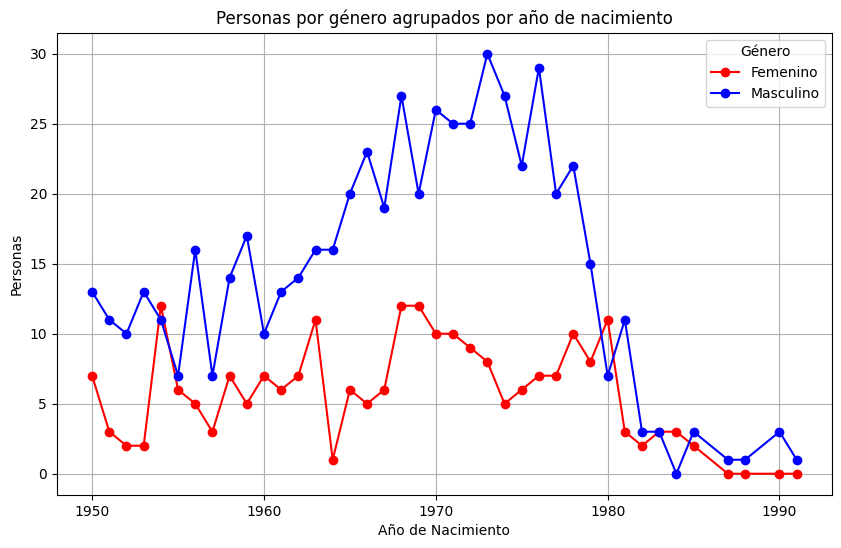

In [30]:
Persona.get_stats(df_personas, yearOfBirth=[1950,2000])